## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix

## Read/Transform Data

In [2]:
#read data
df = pd.read_csv('cleaned-data.csv')

In [3]:
#join and shuffle data
df = df.sample(frac=1).reset_index(drop=True) #sample shuffles the data
df.head()

,Lyric,Genres
0,the quickening is an ephemeral thing that only...,Punk Rock; Rock
1,i want to hold the hand inside you i want to t...,Rock; Heavy Metal; Gótico
2,music rolf kasparek lyrics rolf kasparek did ...,Heavy Metal; Hard Rock
3,if you dont mind why dont you mind where is yo...,Indie; R&B
4,broken hands so sans soleil it lights my way t...,Emocore; Rock; Hardcore


In [4]:
indexNames = []
for index, row in df.iterrows():
    if len(row.Genres.split("; "))>1 or (row.Genres != "Pop" and row.Genres!="Rap"):
        indexNames.append(index)
df = df.drop(indexNames)

In [5]:
x = np.array(df['Lyric']) #"text"
y = np.array(df['Genres'])

In [6]:
len(set(df['Genres']))

2

<AxesSubplot:>

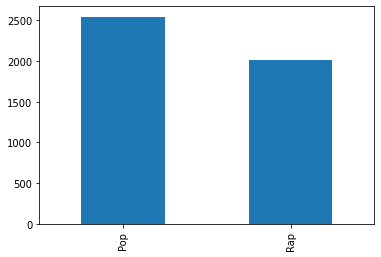

In [7]:
df['Genres'].value_counts().plot.bar()

In [8]:
# tokenizer to transform text into tokens
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=200000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    #document_count=0, **kwargs
)

# Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(x)

#Transforms each text in x to a sequence of integers.
x = tokenizer.texts_to_sequences(x)

#Pads sequences to the same length. In this case, with maxlen of 100 integers
x = pad_sequences(x, maxlen = 250)

# tokenizer to transform text into tokens
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=100000,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    #document_count=0, **kwargs
)

# Updates internal vocabulary based on a list of texts.
tokenizer.fit_on_texts(y)

#Transforms each text in x to a sequence of integers.
y = tokenizer.texts_to_sequences(y)

y = np.array([[1, 0] if temp[0]==1 else [0, 1] for temp in y])

#Pads sequences to the same length. In this case, with maxlen of 100 integers
#y = pad_sequences(x, maxlen = 1)

[[1], [2], [2], [2], [1], [1], [2], [1], [1], [1], [1], [1], [2], [2], [2], [1], [1], [2], [2], [1], [2], [1], [1], [1], [1], [1], [1], [1], [1], [2], [1], [1], [2], [1], [2], [1], [2], [1], [1], [1], [2], [2], [2], [2], [2], [1], [2], [2], [2], [1], [1], [1], [1], [2], [2], [1], [2], [1], [2], [1], [2], [2], [2], [1], [2], [2], [1], [1], [1], [2], [1], [2], [2], [1], [1], [1], [1], [2], [2], [2], [2], [2], [1], [2], [1], [1], [2], [1], [1], [2], [1], [1], [1], [2], [1], [1], [1], [1], [2], [1], [2], [1], [2], [1], [2], [2], [1], [1], [2], [1], [1], [1], [2], [2], [2], [2], [2], [1], [2], [1], [2], [1], [2], [1], [1], [1], [2], [2], [1], [1], [1], [2], [2], [2], [1], [2], [2], [1], [1], [2], [1], [1], [2], [1], [2], [1], [1], [1], [1], [2], [1], [1], [1], [1], [1], [2], [1], [2], [2], [1], [2], [1], [1], [1], [1], [1], [1], [1], [2], [1], [1], [2], [1], [1], [1], [1], [1], [2], [2], [1], [2], [1], [1], [1], [1], [1], [2], [1], [2], [2], [1], [2], [1], [1], [1], [1], [2], [2], [2], [2],

In [9]:
def LSTM_Model(vocab_size=200000, features=500, input_length=250, learning_rate=0.00001, dropout=0):
    model=Sequential()
    # Embedding layer
    model.add(Embedding(vocab_size,features,input_length=input_length))
    # Long Short Term Memory layer
    model.add(LSTM(200, dropout=dropout))
    # Output layer
    model.add(Dense(2,activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LSTM_Model()
res = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=34,batch_size=64)

Epoch 1/30
57/57 [==============================] - 17s 304ms/step - loss: 0.1275 - accuracy: 0.9704 - val_loss: 0.3078 - val_accuracy: 0.9035
Epoch 2/30
57/57 [==============================] - 18s 316ms/step - loss: 0.1240 - accuracy: 0.9715 - val_loss: 0.2977 - val_accuracy: 0.9068
Epoch 3/30
57/57 [==============================] - 18s 314ms/step - loss: 0.1192 - accuracy: 0.9712 - val_loss: 0.2884 - val_accuracy: 0.9090
Epoch 4/30
57/57 [==============================] - 18s 314ms/step - loss: 0.1107 - accuracy: 0.9737 - val_loss: 0.2736 - val_accuracy: 0.9079
Epoch 5/30
57/57 [==============================] - 18s 314ms/step - loss: 0.1028 - accuracy: 0.9761 - val_loss: 0.2853 - val_accuracy: 0.9123
Epoch 6/30
57/57 [==============================] - 18s 314ms/step - loss: 0.0954 - accuracy: 0.9783 - val_loss: 0.2924 - val_accuracy: 0.9079
Epoch 7/30
57/57 [==============================] - 18s 317ms/step - loss: 0.0882 - accuracy: 0.9811 - val_loss: 0.2951 - val_accuracy: 0.9134